# 유튜브 랭킹 시각화

In [20]:
!apt-get update > /dev/null
!pip install selenium > /dev/null
!apt install chromium-chromedriver > /dev/null

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [ ]:
# 파일 업로드: 구글 코랩
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

In [23]:
import csv

df = pd.read_csv(r'D:\Workspace\02_DataAnalysis\05.Crawling\Data\유튜브_순위.csv')
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,735,840,000",654
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,895,380,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [24]:
# 구독자수(문자열) --> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,735,840,000",654,60400000
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,579",56500000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,895,380,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [25]:
def str2int(x):
    return int(x.replace(',',''))

In [26]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000,371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,735,840,000",654,60400000,654
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,579",56500000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,895,380,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 Top20(채널명, 비디오수) 막대 그래프

In [27]:
df.sort_values(by='비디오수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,462,390,000","553,462",2500000,553462
707,뉴스/정치/사회,연합뉴스TV,"700,000","918,130,000","362,555",700000,362555
59,TV/방송,SBS Drama,"5,480,000","5,750,870,000","340,878",5480000,340878
56,TV/방송,SBS Entertainment,"5,720,000","6,664,750,000","216,725",5720000,216725
337,뉴스/정치/사회,KBS News,"1,320,000","1,844,530,000","176,159",1320000,176159
968,뉴스/정치/사회,Arirang News,"530,000","237,800,000","123,984",530000,123984
244,뉴스/정치/사회,JTBC News,"1,710,000","2,409,660,000","116,553",1710000,116553
290,뉴스/정치/사회,MBCNEWS,"1,500,000","3,383,580,000","115,414",1500000,115414
112,TV/방송,KBS Drama,"3,470,000","4,261,110,000","114,095",3470000,114095
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,672,520,000","111,308",1780000,111308


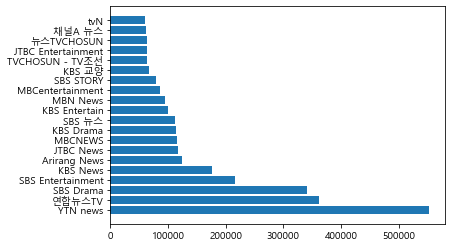

In [28]:
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)

plt.barh(df2['채널명'], df2['비디오수2'])
plt.show()

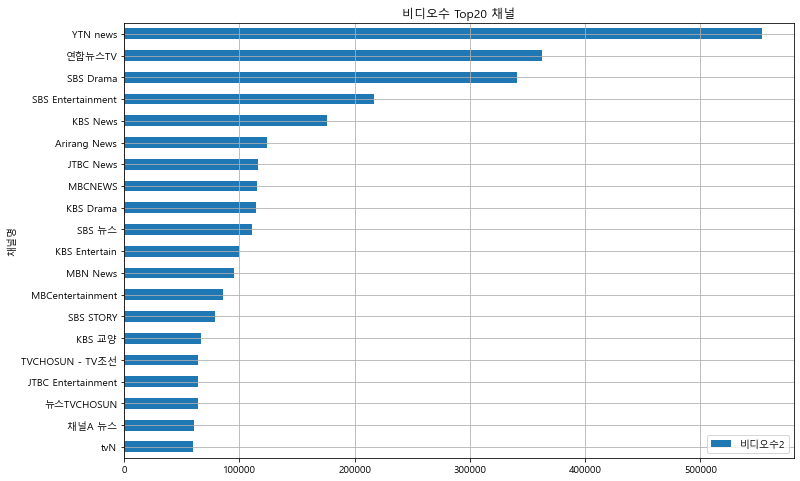

In [29]:
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

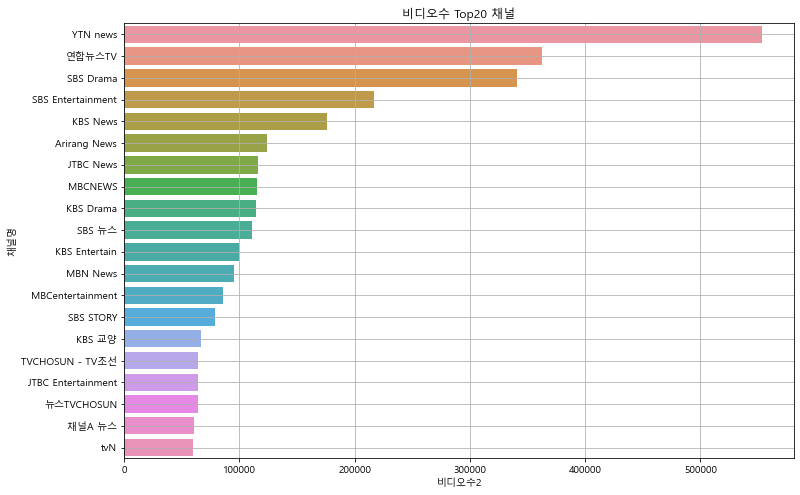

In [30]:
import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.grid()
plt.show()

- 조회수 기준 Top20 채널 시각화

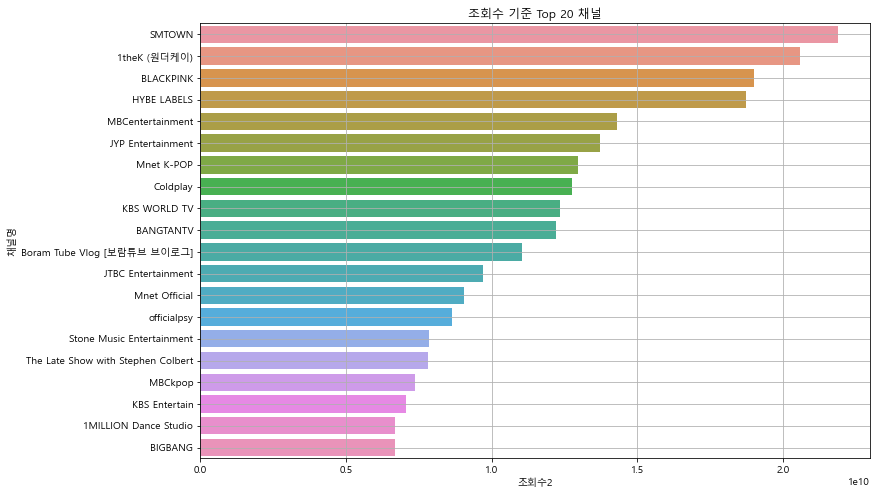

In [31]:
df['조회수2'] = df.조회수.apply(str2int)

plt.figure(figsize=(12,8))
sns.barplot(x='조회수2', y='채널명', data=df.sort_values(by='조회수2', ascending=False).head(20))
plt.title('조회수 기준 Top 20 채널')
plt.grid()
plt.show()

- 카테고리별 채널수 분포

In [32]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


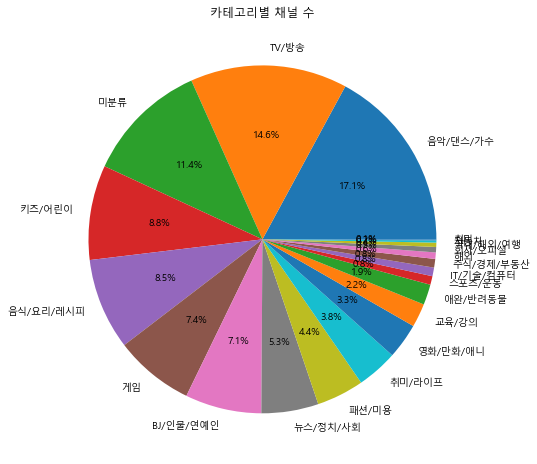

In [33]:
df3 = df['카테고리'].value_counts().to_frame()

plt.figure(figsize=(12,8))
plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

- 카테고리별 구독자수 합계 시각화

In [34]:
df4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df4.columns = ['채널수','구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,674560000
키즈/어린이,88,257790000
TV/방송,146,229800000
음식/요리/레시피,85,180620000
미분류,114,143500000
BJ/인물/연예인,71,97620000
뉴스/정치/사회,53,71050000
게임,74,67180000
취미/라이프,38,47890000


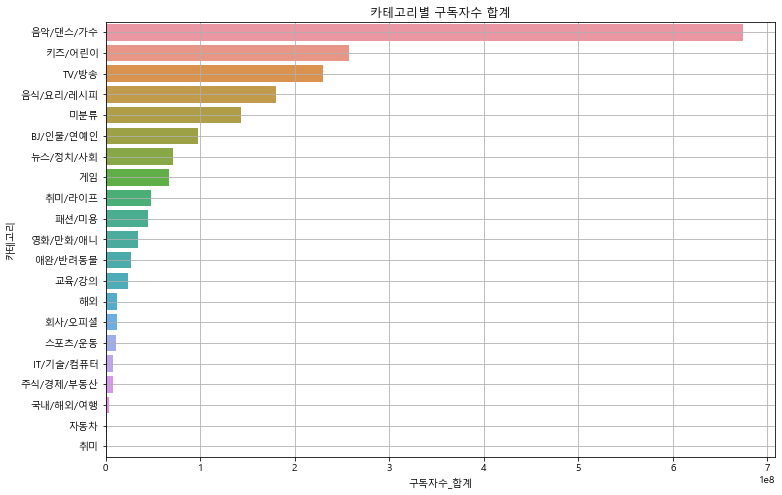

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.title('카테고리별 구독자수 합계')
plt.grid()
plt.show()

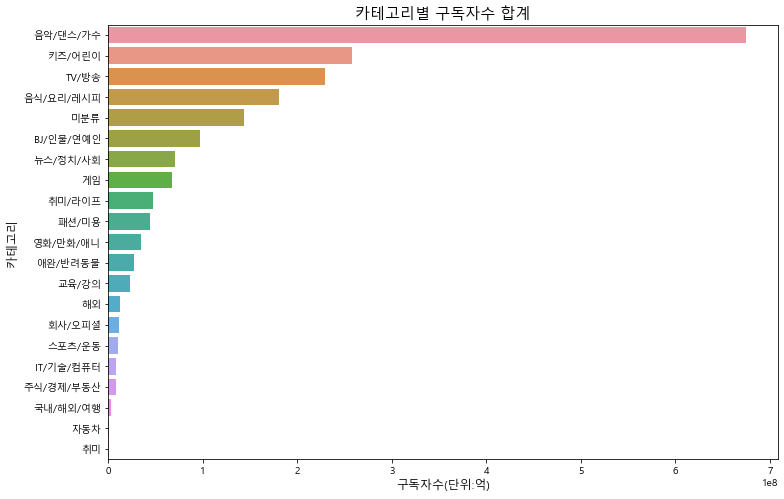

In [36]:
df_new = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum']) \
                .reset_index().sort_values(by=('구독자수2', 'sum'), ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= ('구독자수2', 'sum'), y='카테고리', data=df_new)
plt.title('카테고리별 구독자수 합계', size=15)
plt.xlabel('구독자수(단위:억)', size=12)
plt.ylabel('카테고리', size=12)
plt.show()

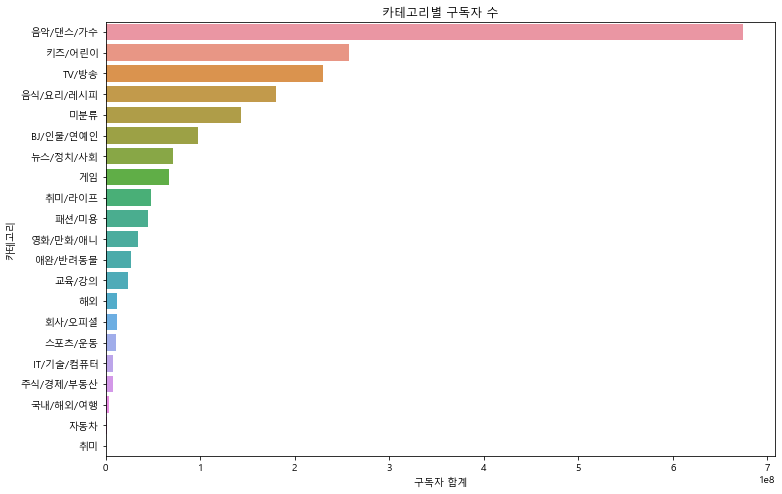

In [37]:

df4 = df.groupby('카테고리').sum().sort_values(by='구독자수2',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='구독자수2', y=df4.index, data=df4)
plt.xlabel('구독자 합계')
plt.title('카테고리별 구독자 수')
plt.show()